# Khám phá dữ liệu BRATS2015 - HGG
Thư mục mẫu: `/training/HGG/brats_2013_pat0001_1`

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os
folder = '/home/nghiapd/medical_dataset/BRATS2015/training/HGG/brats_2013_pat0001_1'
modalities = {
    'FLAIR': 'VSD.Brain.XX.O.MR_Flair.54512.mha',
    'T1': 'VSD.Brain.XX.O.MR_T1.54513.mha',
    'T1c': 'VSD.Brain.XX.O.MR_T1c.54514.mha',
    'T2': 'VSD.Brain.XX.O.MR_T2.54515.mha',
    'SEG': 'VSD.Brain_3more.XX.O.OT.54517.mha'
}

In [2]:
# Đọc và hiển thị thông tin từng file
images = {}
for key, fname in modalities.items():
    path = os.path.join(folder, fname)
    img = sitk.ReadImage(path)
    arr = sitk.GetArrayFromImage(img)
    images[key] = arr
    print(f'{key}: shape={arr.shape}, dtype={arr.dtype}')

FLAIR: shape=(155, 240, 240), dtype=int16
T1: shape=(155, 240, 240), dtype=int16
T1c: shape=(155, 240, 240), dtype=int16
T2: shape=(155, 240, 240), dtype=int16
SEG: shape=(155, 240, 240), dtype=int16


In [3]:
# In thông tin chi tiết từng file
for key, fname in modalities.items():
    path = os.path.join(folder, fname)
    img = sitk.ReadImage(path)
    arr = sitk.GetArrayFromImage(img)
    print(f'{key}: shape={arr.shape}, dtype={arr.dtype}')
    print(f'  Min value: {arr.min()}')
    print(f'  Max value: {arr.max()}')
    print(f'  Mean value: {arr.mean():.2f}')
    print(f'  Voxel dimensions: {img.GetSpacing()}')
    print('-'*40)

FLAIR: shape=(155, 240, 240), dtype=int16
  Min value: 0
  Max value: 1273
  Mean value: 59.87
  Voxel dimensions: (1.0, 1.0, 1.0)
----------------------------------------
T1: shape=(155, 240, 240), dtype=int16
  Min value: 0
  Max value: 1043
  Mean value: 63.01
  Voxel dimensions: (1.0, 1.0, 1.0)
----------------------------------------
T1c: shape=(155, 240, 240), dtype=int16
  Min value: 0
  Max value: 1516
  Mean value: 82.23
  Voxel dimensions: (1.0, 1.0, 1.0)
----------------------------------------
T2: shape=(155, 240, 240), dtype=int16
  Min value: 0
  Max value: 1584
  Mean value: 74.67
  Voxel dimensions: (1.0, 1.0, 1.0)
----------------------------------------
SEG: shape=(155, 240, 240), dtype=int16
  Min value: 0
  Max value: 4
  Mean value: 0.03
  Voxel dimensions: (1.0, 1.0, 1.0)
----------------------------------------


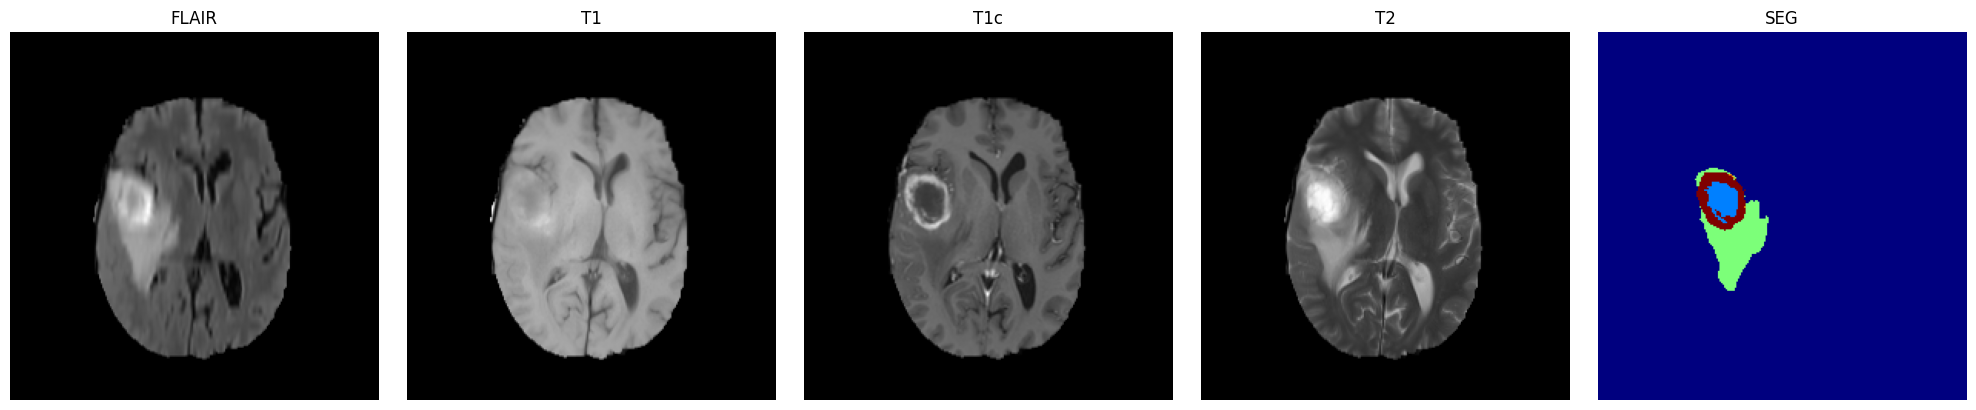

In [4]:
# Hiển thị lát cắt giữa (axial) cho từng modality
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
modal_keys = ['FLAIR', 'T1', 'T1c', 'T2', 'SEG']
for i, key in enumerate(modal_keys):
    arr = images[key]
    mid_slice = arr.shape[0] // 2
    axes[i].imshow(arr[mid_slice, :, :], cmap='gray' if key != 'SEG' else 'jet')
    axes[i].set_title(key)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## Hiển thị lát cắt giữa cho các trục Axial, Coronal, Sagittal

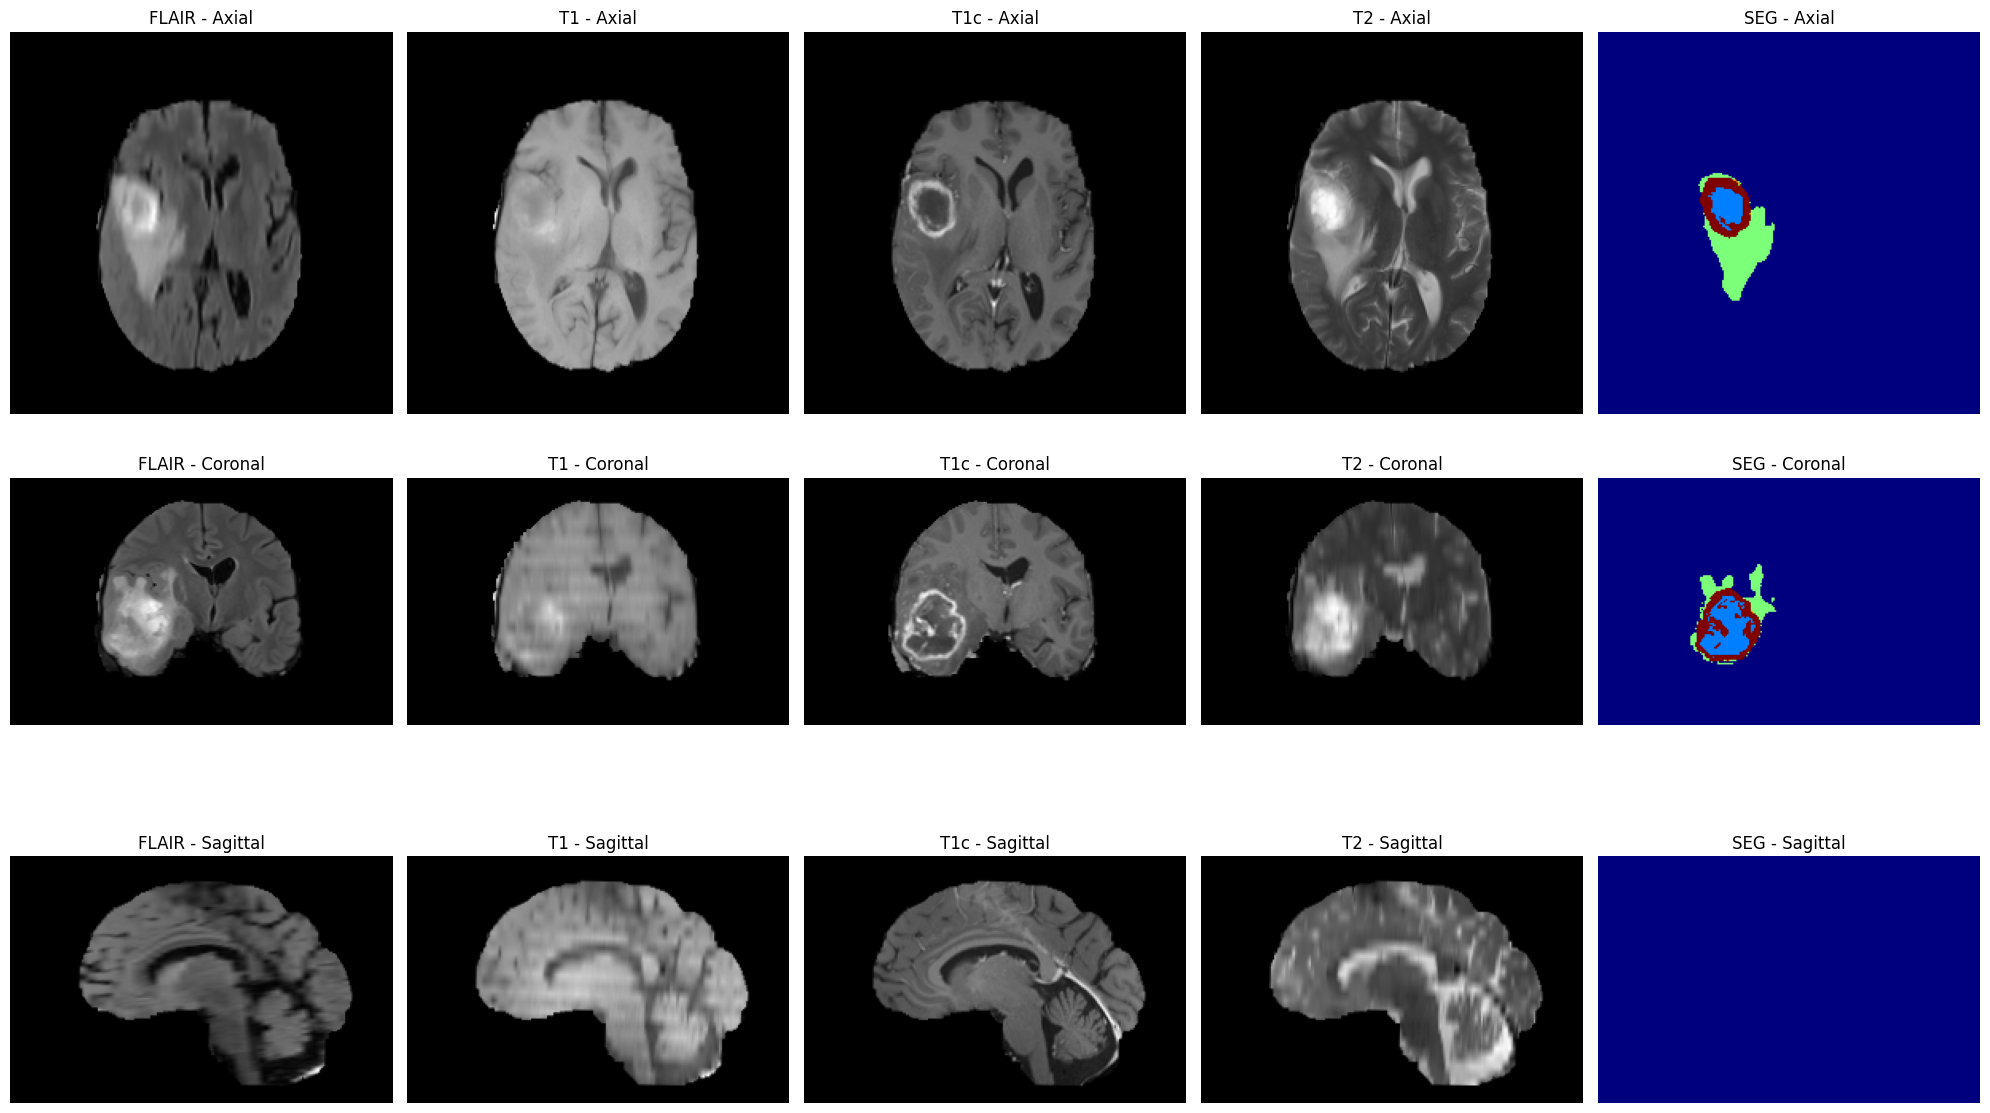

In [5]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
modal_keys = ['FLAIR', 'T1', 'T1c', 'T2', 'SEG']
for i, key in enumerate(modal_keys):
    arr = images[key]
    # Axial (Z): lát cắt giữa theo chiều dọc
    axial_idx = arr.shape[0] // 2
    axes[0, i].imshow(arr[axial_idx, :, :], cmap='gray' if key != 'SEG' else 'jet')
    axes[0, i].set_title(f'{key} - Axial')
    axes[0, i].axis('off')
    # Coronal (Y): lát cắt giữa theo chiều ngang
    coronal_idx = arr.shape[1] // 2
    axes[1, i].imshow(np.rot90(arr[:, coronal_idx, :].T, k=1), cmap='gray' if key != 'SEG' else 'jet')
    axes[1, i].set_title(f'{key} - Coronal')
    axes[1, i].axis('off')
    # Sagittal (X): lát cắt giữa theo chiều trước-sau
    sagittal_idx = arr.shape[2] // 2
    axes[2, i].imshow(np.rot90(arr[:, :, sagittal_idx].T, k=1), cmap='gray' if key != 'SEG' else 'jet')
    axes[2, i].set_title(f'{key} - Sagittal')
    axes[2, i].axis('off')
plt.tight_layout()
plt.show()

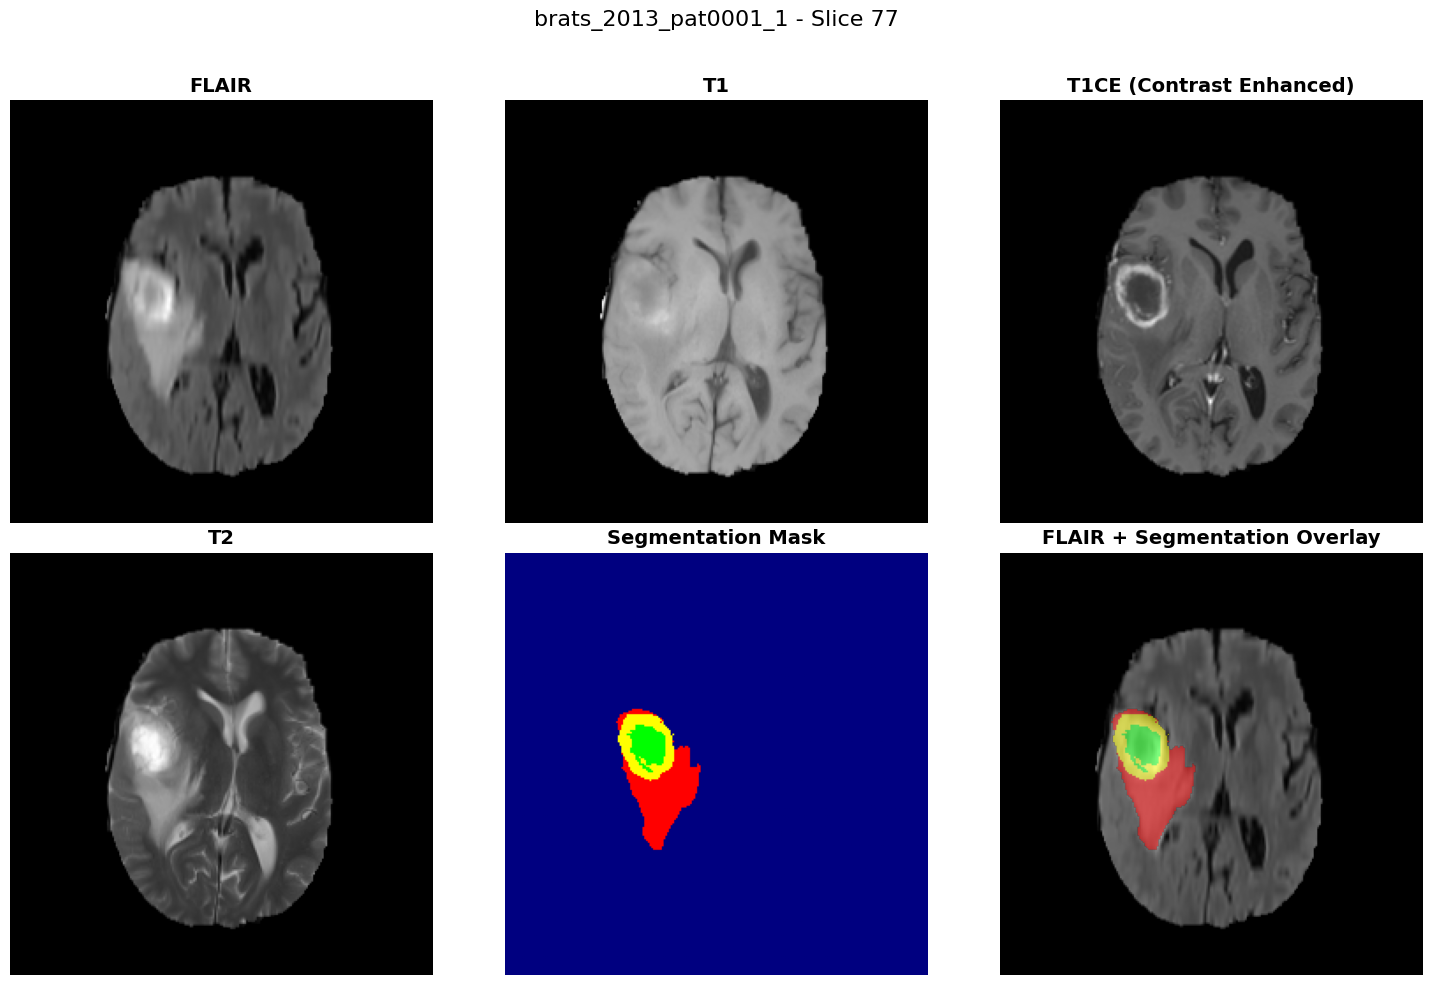

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Chọn lát cắt giữa
mid_slice = images['FLAIR'].shape[0] // 2

# Lấy dữ liệu từng modality
flair_img = images['FLAIR'][mid_slice, :, :]
t1_img = images['T1'][mid_slice, :, :]
t1c_img = images['T1c'][mid_slice, :, :]
t2_img = images['T2'][mid_slice, :, :]
seg_img = images['SEG'][mid_slice, :, :]

# Tạo custom colormap cho segmentation mask
seg_cmap = ListedColormap([
    'navy',      # 0: background
    'lime',      # 1: edema
    'red',       # 2: non-enhancing tumor
    'yellow'     # 3: enhancing tumor
])

# Overlay segmentation lên FLAIR (chỉ vùng có nhãn)
masked_seg = np.ma.masked_where(seg_img == 0, seg_img)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"brats_2013_pat0001_1 - Slice {mid_slice}", fontsize=16)

axes[0, 0].imshow(flair_img, cmap='gray')
axes[0, 0].set_title('FLAIR', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(t1_img, cmap='gray')
axes[0, 1].set_title('T1', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(t1c_img, cmap='gray')
axes[0, 2].set_title('T1CE (Contrast Enhanced)', fontsize=14, fontweight='bold')
axes[0, 2].axis('off')

axes[1, 0].imshow(t2_img, cmap='gray')
axes[1, 0].set_title('T2', fontsize=14, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(seg_img, cmap=seg_cmap, vmin=0, vmax=3)
axes[1, 1].set_title('Segmentation Mask', fontsize=14, fontweight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(flair_img, cmap='gray')
axes[1, 2].imshow(masked_seg, cmap=seg_cmap, alpha=0.5, vmin=0, vmax=3)
axes[1, 2].set_title('FLAIR + Segmentation Overlay', fontsize=14, fontweight='bold')
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()